# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
pip install citipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 675.6/675.6 kB 1.1 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675969 sha256=701700e1b44e05d296f56cecf9952e9e006530956e0cd9c881246a193b3670a8
  Stored in directory: /Users/rachelmmm/Library/Caches/pip/wheels/4b/b5/88/49107ff846ec6967b34c17d369176c591fc90ed93b706755ad
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
city = 'tashtagol'
url_city = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q={city}"
response = requests.get(url_city).json()
response

{'coord': {'lon': 87.8894, 'lat': 52.7657},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 289.82,
  'feels_like': 289.76,
  'temp_min': 289.82,
  'temp_max': 289.82,
  'pressure': 1006,
  'humidity': 85,
  'sea_level': 1006,
  'grnd_level': 953},
 'visibility': 10000,
 'wind': {'speed': 1.25, 'deg': 117, 'gust': 1.57},
 'clouds': {'all': 54},
 'dt': 1692926192,
 'sys': {'country': 'RU', 'sunrise': 1692918368, 'sunset': 1692969343},
 'timezone': 25200,
 'id': 1490042,
 'name': 'Tashtagol',
 'cod': 200}

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
url

'http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=82592edb295a059a1a6f8917456e739f'

In [7]:
# Set the API base URL
#curly brackets are used in f-string only, if concatenating 2 strings then do not use curly brackets
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | manokwari
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | kapa'a
Processing Record 5 of Set 1 | devinuwara
City not found. Skipping...
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | balabac
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | ulety
Processing Record 10 of Set 1 | vilyuchinsk
Processing Record 11 of Set 1 | khanty-mansiysk
Processing Record 12 of Set 1 | kingston
Processing Record 13 of Set 1 | larkana
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | wagar
Processing Record 17 of Set 1 | kargasok
Processing Record 18 of Set 1 | khandyga
Processing Record 19 of Set 1 | rio grande
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | puerto natales
Processing Record 

In [8]:
len(city_data)

600

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df

# Show Record Count
city_data_df.count()

City          600
Lat           600
Lng           600
Max Temp      600
Humidity      600
Cloudiness    600
Wind Speed    600
Country       600
Date          600
dtype: int64

In [10]:
city_data_df.head()
len(city_data_df)

600

In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,9.90,86,96,2.68,NZ,1692926220
1,manokwari,-0.8667,134.0833,28.10,73,100,2.60,ID,1692926221
2,bethel,41.3712,-73.4140,20.86,88,100,0.00,US,1692926222
3,kapa'a,22.0752,-159.3190,31.18,72,40,6.69,US,1692926223
4,balabac,7.9868,117.0645,29.24,68,28,1.08,PH,1692926225
...,...,...,...,...,...,...,...,...,...
595,haiku-pauwela,20.9219,-156.3051,30.01,59,20,10.80,US,1692926686
596,mitu,1.1983,-70.1733,23.46,91,83,1.22,CO,1692926490
597,summerside,46.3959,-63.7876,15.06,77,5,3.60,CA,1692926687


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

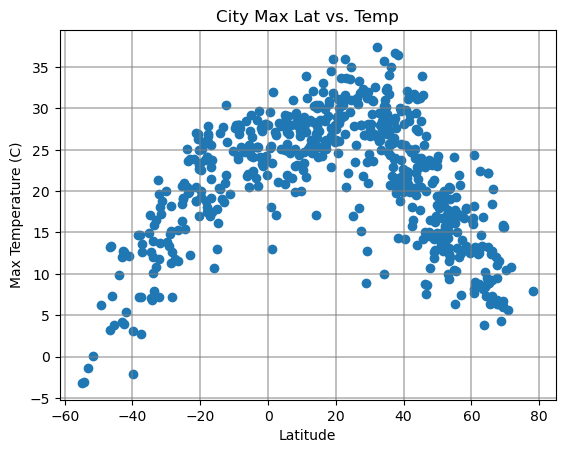

In [13]:
# Build scatter plot for latitude vs. temperature   
# Incorporate the other graph properties
plt.title('City Max Lat vs. Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])
plt.grid(True, color ='grey', linewidth = 1.4, alpha = 0.5)

# Save the figure
plt.savefig("../output_data/Fig1_new.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

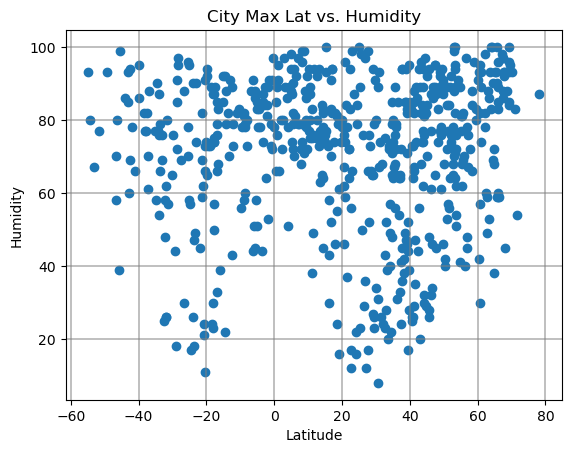

In [16]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
plt.title('City Max Lat vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])
plt.grid(True, color ='grey', linewidth = 1.4, alpha = 0.5)

# Save the figure
plt.savefig("../output_data/Fig2_new.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

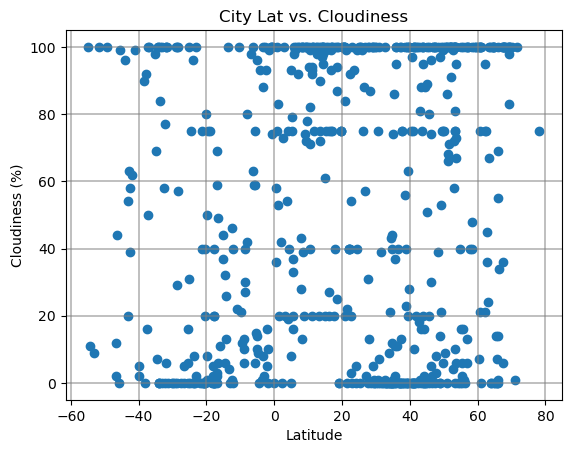

In [17]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
plt.title('City Lat vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])
plt.grid(True, color ='grey', linewidth = 1.4, alpha = 0.5)

# Save the figure
plt.savefig("../output_data/Fig3_new.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

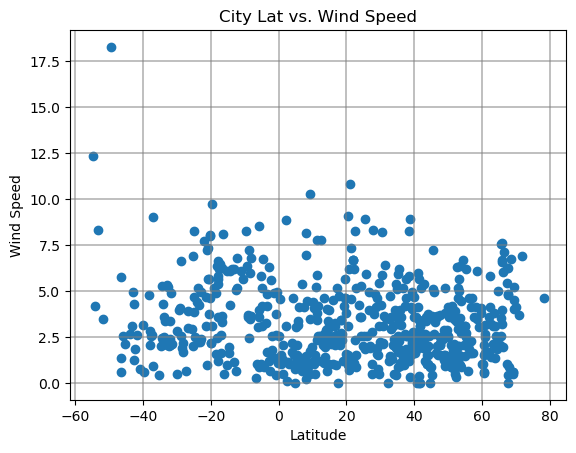

In [18]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
plt.title('City Lat vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])
plt.grid(True, color ='grey', linewidth = 1.4, alpha = 0.5)


# Save the figure
plt.savefig("../output_data/Fig4_new.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [63]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_axis,y_axis,title,text_cod):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    
    line_eq = "y="+str(round(slope,2))+"x+ "+str(round(intercept,2))
    #re-plot the scatterplot with the regression line  
    plt.scatter(x_axis,y_axis, marker ='o',facecolors='blue',edgecolors='black')
    plt.plot(x_axis,regress_values, "r-")
    plt.annotate(line_eq,text_cod, fontsize=12,color='red')
    plt.xlabel("Latitude")
    plt.ylabel(title)
    
    #print the correlation of lat
    #round to 2 decimal places
    print(f"The r-value is" + " " + str(round(rvalue,2)))
    print(f"The p-value is" + " " + str(round(pvalue,3)))
    plt.show()
    

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0,:]
northern_hemi_df
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bethel,41.3712,-73.4140,20.86,88,100,0.00,US,1692926222
3,kapa'a,22.0752,-159.3190,31.18,72,40,6.69,US,1692926223
4,balabac,7.9868,117.0645,29.24,68,28,1.08,PH,1692926225
6,ulety,51.3572,112.4849,14.93,77,66,0.80,RU,1692926226
7,vilyuchinsk,52.9306,158.4028,15.15,99,100,1.16,RU,1692926227


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0,:]
southern_hemi_df
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,9.90,86,96,2.68,NZ,1692926220
1,manokwari,-0.8667,134.0833,28.10,73,100,2.60,ID,1692926221
5,port-aux-francais,-49.3500,70.2167,6.24,93,100,18.26,TF,1692926225
12,grytviken,-54.2811,-36.5092,-3.03,80,11,4.17,GS,1692926230
16,rio grande,-32.0350,-52.0986,7.19,62,6,2.06,BR,1692926233


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.69
The p-value is 0.0


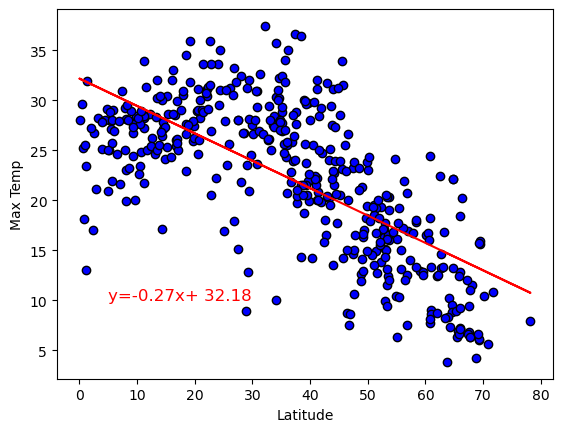

In [64]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], 'Max Temp', (5,10))

The r-value is 0.83
The p-value is 0.0


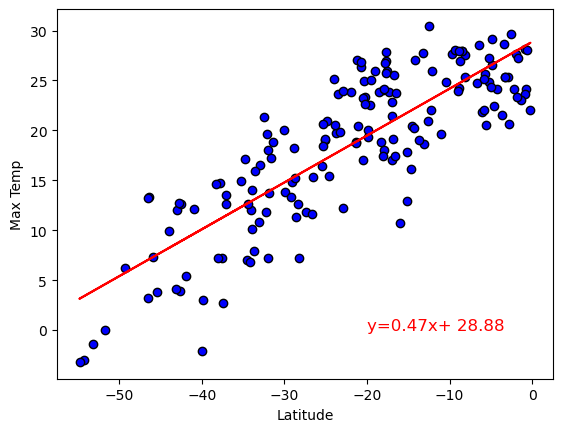

In [65]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], 'Max Temp', (-20,0))

**Discussion about the linear relationship:**  
In the northern hemisphere, the correlation between max temperature and latitude is negative and is moderately strong.
This relationship is statistically significant.

In the southern hemisphere, the correlation between max temperature and latitude is positive and is strong.
This relationship is statistically significant.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.04
The p-value is 0.458


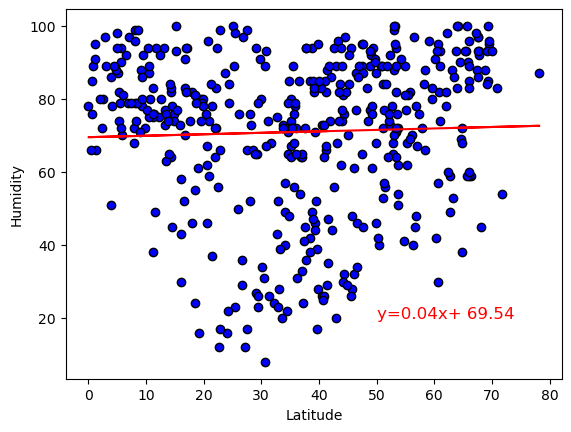

In [66]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], 'Humidity', (50,20))

The r-value is 0.02
The p-value is 0.789


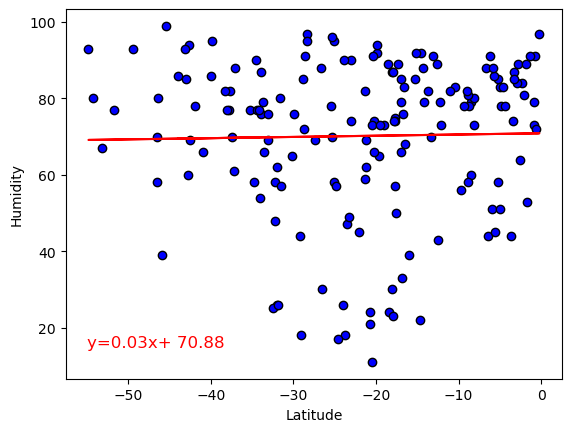

In [67]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], 'Humidity', (-55,15))

**Discussion about the linear relationship:** 
In the northern hemisphere, the correlation between humidity and latitude is positive and is weak.
This relationship is statistically non-significant.

In the southern hemisphere, the correlation between humidity and latitude is positive and is weak.
This relationship is statistically non-significant.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is -0.05
The p-value is 0.342


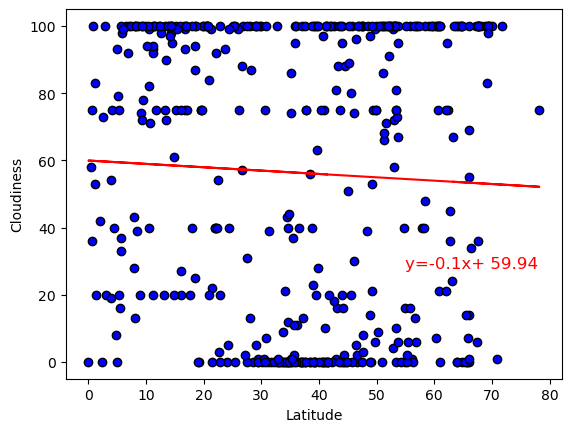

In [68]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], 'Cloudiness', (55,28))

The r-value is -0.07
The p-value is 0.398


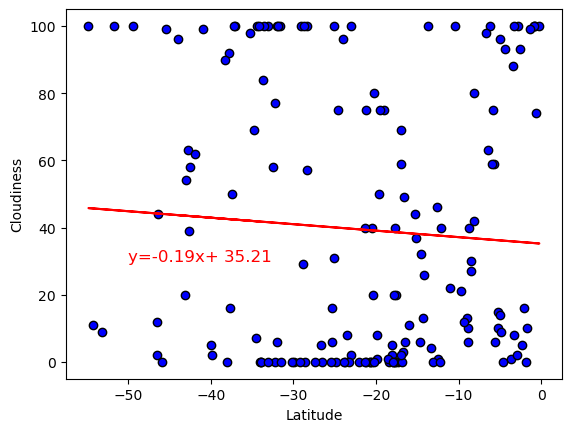

In [69]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], 'Cloudiness', (-50,30))

**Discussion about the linear relationship:** 
In the northern hemisphere, the correlation between cloudiness and latitude is negative and is weak.
This relationship is statistically non-significant.

In the southern hemisphere, the correlation between cloudiness and latitude is negative and is weak.
This relationship is statistically non-significant.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.04
The p-value is 0.433


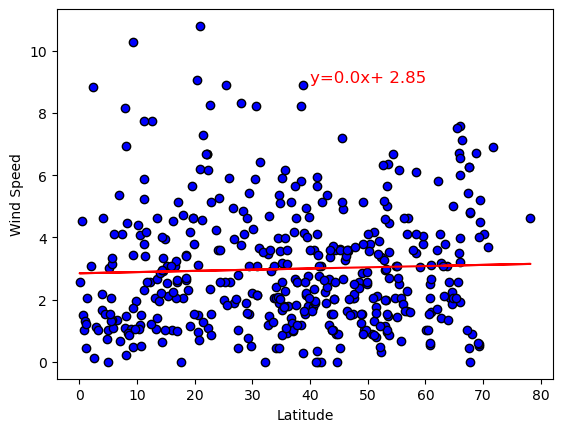

In [70]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], 'Wind Speed', (40,9))

The r-value is -0.03
The p-value is 0.715


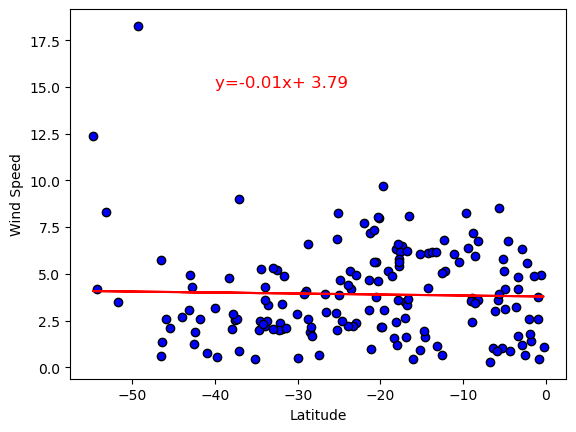

In [71]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], 'Wind Speed', (-40,15))

**Discussion about the linear relationship:** 
In the northern hemisphere, the correlation between wind speed and latitude is positive and is weak.
This relationship is statistically non-significant.

In the southern hemisphere, the correlation between wind speed and latitude is negative and is weak.
This relationship is statistically non-significant.